In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn 
%matplotlib inline

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score : {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score : {:.3f}".format(logreg.score(X_test, y_test)))

Training set score : 0.953
Test set score : 0.958


In [5]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score : {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score : {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score : 0.972
Test set score : 0.965


In [6]:
logreg001 = LogisticRegression(C=0.001).fit(X_train, y_train)
print("Training set score : {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score : {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score : 0.923
Test set score : 0.937


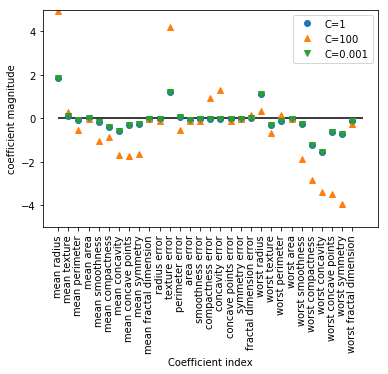

In [7]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("coefficient magnitude")
plt.legend()

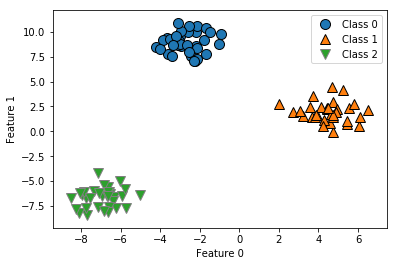

In [8]:
#LinearSVC
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [10]:
from sklearn.svm import LinearSVC, SVC
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


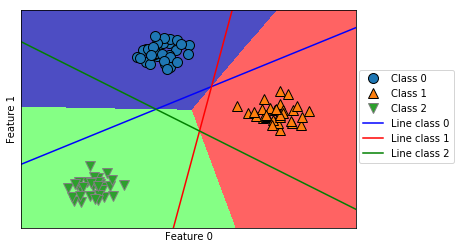

In [14]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill = True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1],y)
line=np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b','r','g']):
    plt.plot(line, -(line*coef[0]+intercept)/coef[1], c=color)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2", "Line class 0", "Line class 1", "Line class 2"], loc=(1.01, 0.3))